In [1]:
import torch
import sys

sys.path.append('..')

from SourceCode import *

from scipy.special import gamma
from math import pi
from math import sqrt

n_epochs = 10
n_points = 20

# №1 Fredholm's equation

### $$ y(x) = sin(\pi*x) + \frac{1}{2}\int_{0}^1y(t)dt $$ ###

$$ analytical solution: y(x) = sin(\pi x) + \frac{2}{\pi} $$

In [12]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 10
integration_func = lambda curr_v, int_domain, nn_model: nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) -
                                            torch.sin(pi * curr_v) - 
               0.5 * IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                                        integration_func,
                                                        nn_model,
                                                        curr_v,
                                                        left_border,
                                                        right_border))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 40
models = NNGenerator.generate_models(
            nn_type='MLP'
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.225, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

In [13]:
analytical_solution = lambda x_var: torch.sin(pi * x_var) + 2 / pi
report = ReportMaker(nn_model,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                         main_eq_residuals=main_eq_res
)

Max residual value |R[NN]| on train: 0.00041854381561279297
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00044405460357666016
Valid max absolute error |Appr(x)-y(x)|: 0.00046372413635253906
MAPE on train data: 0.01610896724741906 %
MAPE on validation data: 0.014474085764959455 %


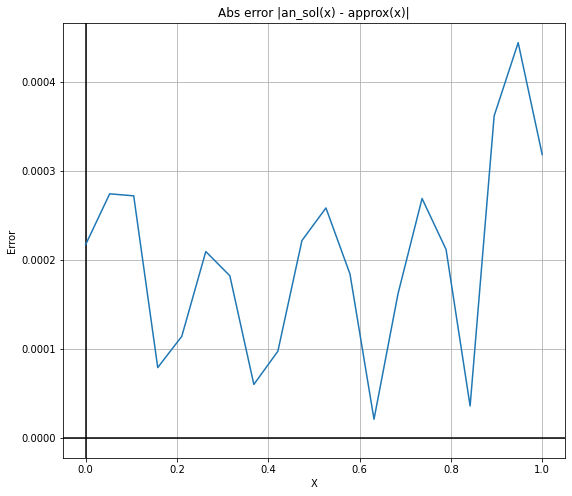

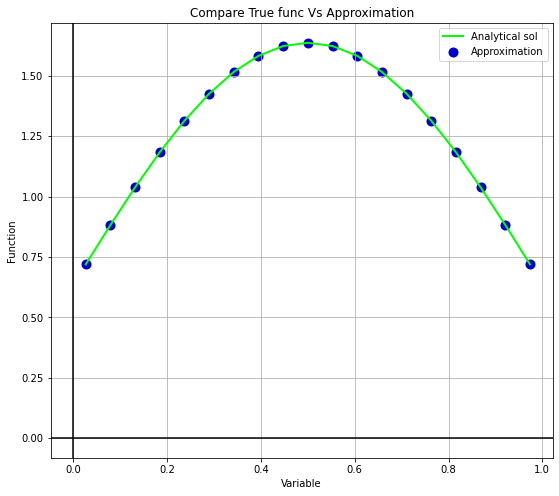

In [14]:
report.compare_appr_with_analytical(offset=0)

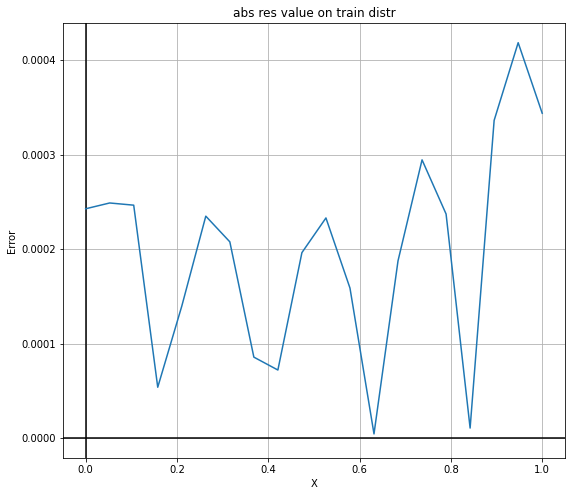

In [15]:
report.plot_abs_residual_distr(offset=0)

# № 2

### $$y(x) = \frac{1}{2}\int_{0}^{\frac{\pi}{2}}xsin(t)y(t)dt + sin(x)$$ ### 
### $$true\_sol = sin(x) + \frac{\pi x}{4}$$ ###

In [16]:
left_border = 0
right_border = pi/2
n_points = 20
n_int_points = 20
integration_func = lambda curr_v, int_domain, nn_model: curr_v * torch.sin(int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               0.5 * IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                    integration_func,
                                    nn_model,
                                    curr_v,
                                    left_border,
                                    right_border) - torch.sin(curr_v))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_params = {'hidden_dim': 10, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type='MLP'
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.1, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

In [17]:
analytical_solution = lambda x_var: torch.sin(x_var) + pi * x_var / 4
report = ReportMaker(nn_model,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
)

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.013919353485107422
Valid max absolute error |Appr(x)-y(x)|: 0.013043999671936035
MAPE on train data: 0.7585093379020691 %
MAPE on validation data: 0.7497814018279314 %


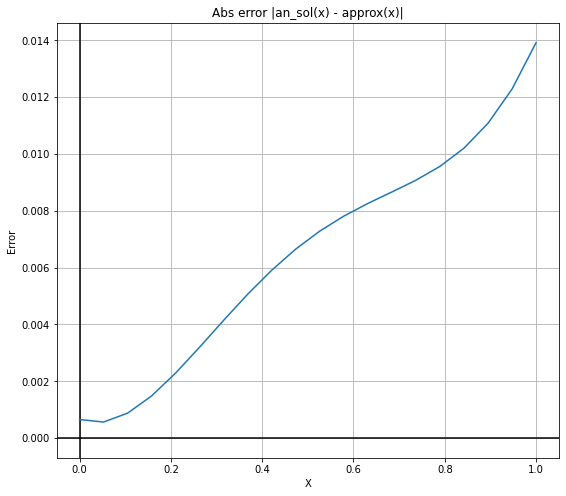

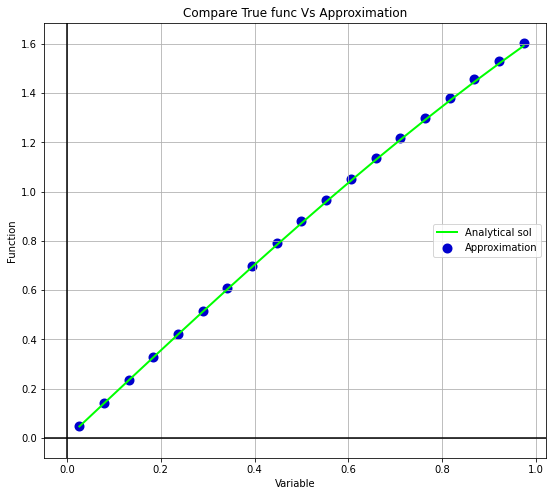

In [18]:
report.compare_appr_with_analytical()

In [19]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.000000      0.000000  0.000652   0.000652
1   0.052632      0.093944  0.094507   0.000563
2   0.105263      0.187742  0.188618   0.000876
3   0.157895      0.281250  0.282733   0.001484
4   0.210526      0.374322  0.376610   0.002288
5   0.263158      0.466815  0.470016   0.003202
6   0.315789      0.558587  0.562735   0.004148
7   0.368421      0.649500  0.654565   0.005065
8   0.421053      0.739415  0.745325   0.005910
9   0.473684      0.828199  0.834852   0.006654
10  0.526316      0.915719  0.923005   0.007286
11  0.578947      1.001847  1.009661   0.007814
12  0.631579      1.086461  1.094721   0.008260
13  0.684211      1.169439  1.178102   0.008663
14  0.736842      1.250667  1.259744   0.009077
15  0.789474      1.330034  1.339599   0.009565
16  0.842105      1.407435  1.417640   0.010205
17  0.894737      1.482769  1.493851   0.011082
18  0.947368      1.555943  1.568231   0.012288
19  1.000000      1.626869  1

#  № 3

### $$ y(x) =  \int_{0}^{1}(\sqrt{xt}y(t)dt + x$$ ###
### $$ true\_sol =  x + \frac{4}{5}\sqrt{x}$$ ###

In [27]:
n_int_points = 100
left_border = 0
right_border = 1
n_points = 20
integration_func = lambda curr_v, int_domain, nn_model: torch.sqrt(curr_v * int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - 
               IntegralEquations.calculate_fredholm_equation_1d_gauss_quadratures(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border) - curr_v)
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 40
nn_params = {'hidden_dim': 20, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type="MLP"
)

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.01, 
)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

In [28]:
analytical_solution = lambda x_var: x_var + torch.sqrt(x_var) * 0.8
report = ReportMaker(nn_model,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
)

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.02539271116256714
Valid max absolute error |Appr(x)-y(x)|: 0.035954877734184265
MAPE on train data: 0.5179666914045811 %
MAPE on validation data: 0.5408706609159708 %


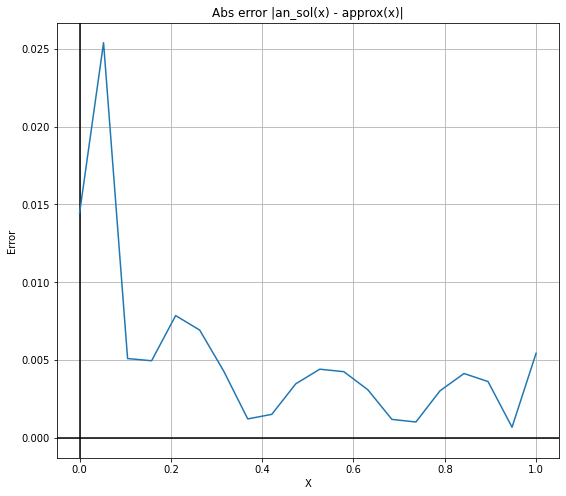

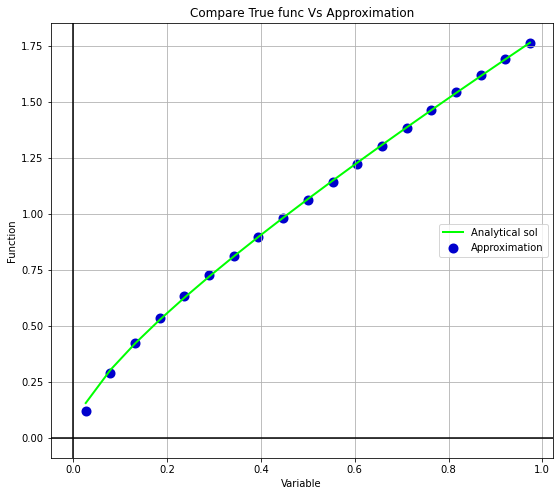

In [29]:
report.compare_appr_with_analytical()

# № 4 Volterra's equation

### $$ y(x) = sin(x) + \int_{0}^{x}sin(x-t)y(t)dt$$ ###
### $$ true\_sol =  x $$ ###

$$x \in [0,1]$$

In [30]:
left_border = 0
right_border = 1
n_points = 20
n_int_points = 50
integration_func = lambda curr_v, int_domain, nn_model: torch.sin(curr_v - int_domain) * nn_model(int_domain)
main_eq_res = (lambda curr_v, nn_model: nn_model(curr_v) - torch.sin(curr_v) - 
               IntegralEquations.calculate_volterra_equation1d(
                                            integration_func,
                                            nn_model,
                                            curr_v,
                                            left_border,
                                            right_border,
                                            n_int_points))
main_domain = OneDimensionalSimpleDomain(0, 1, n_points, offset=0)

main_eq = MainEquationClass(main_domain, main_eq_res)
n_epochs = 10
nn_params = {'hidden_dim': 10, 'num_hidden_layers': 3}
models = NNGenerator.generate_models(
            nn_count=1, 
            nn_params = nn_params,
            nn_type="MLP"
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, 
            nn_models=models,
            lr = 0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

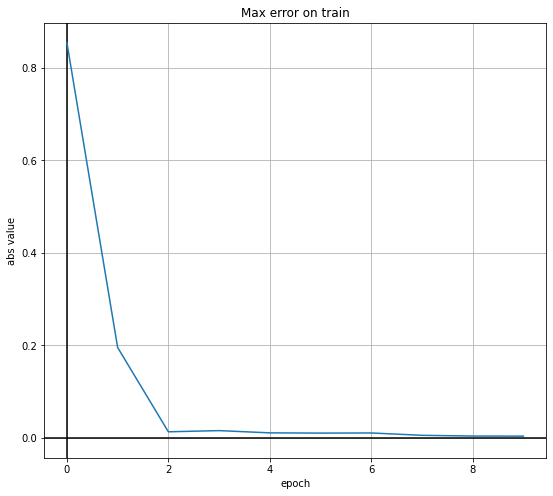

Value at last epoch: 0.004094138741493225


In [31]:
analytical_solution = lambda x_var: x_var
report = ReportMaker(nn_model,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution,
                         main_eq_residuals=main_eq_res
                         )
report.plot_error_history(loss_train)

Max residual value |R[NN]| on train: 0.002499401569366455
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0029768943786621094
Valid max absolute error |Appr(x)-y(x)|: 0.0020706653594970703
MAPE on train data: 0.22333823144435883 %
MAPE on validation data: 0.2032427815720439 %


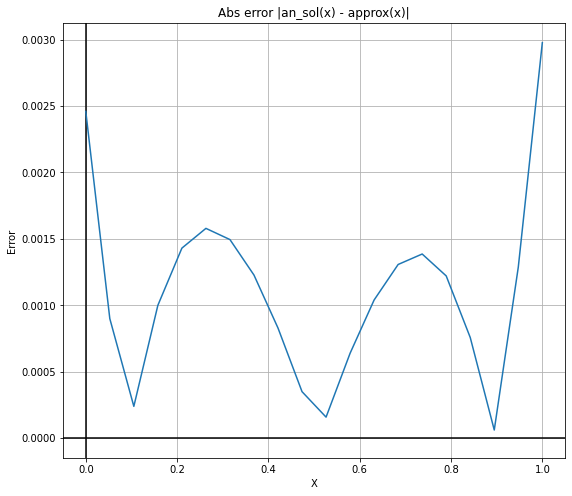

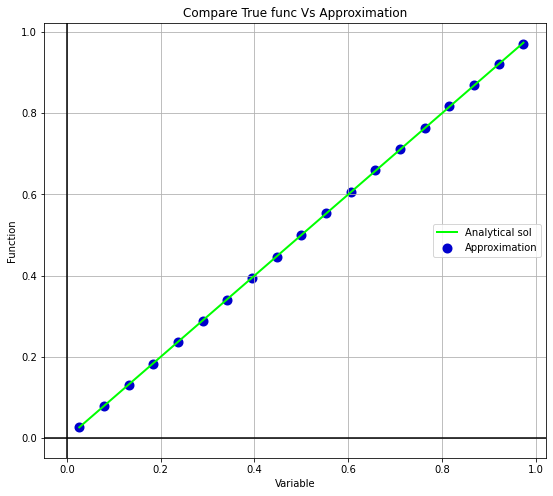

In [32]:
report.compare_appr_with_analytical()

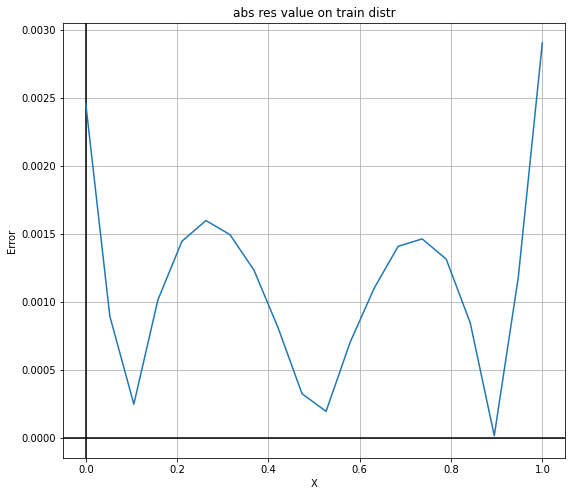

In [33]:
report.plot_abs_residual_distr(offset=0)